In [47]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2 as cv
from scipy.linalg import fractional_matrix_power

In [3]:
from IPython.display import display
import ipywidgets as widgets




text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Select Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    data = [[1, 2], [3, 4]]
    dt = pd.DataFrame(data, columns=["Foo", "Bar"], index=['he', 'as'])
    print(dt)


button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

### change of matrix type methods

In [54]:
data = pd.read_csv('../csv/test_mpc.csv',sep=';', header=None)
print(f'''initial matrix =
{data.values}''')
data = np.array(data.values)
# x_flat = [i for sub_l in data for i in sub_l]
# print(x_flat)

def convert_preference_facts_to_intensity(matrix, i : float = 0.7):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == matrix[cl][rw]:
                matrix_copy[rw][cl] = 0.5
                matrix_copy[cl][rw] = 0.5
            elif matrix[rw][cl] == 1:
                matrix_copy[rw][cl] = i
                matrix_copy[cl][rw] = 1-i
            else:
                matrix_copy[rw][cl] = 1-i
                matrix_copy[cl][rw] = i

    # print(matrix_copy)
    return matrix_copy

def convert_preference_facts_to_scores(matrix, m : float = 10, v : float = 7):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == matrix[cl][rw]:
                matrix_copy[rw][cl] = m/2
                matrix_copy[cl][rw] = m/2
            elif matrix[rw][cl] == 1:
                matrix_copy[rw][cl] = v
                matrix_copy[cl][rw] = m-v
            else:
                matrix_copy[rw][cl] = m-v
                matrix_copy[cl][rw] = v

    # print(matrix_copy)
    return matrix_copy

def convert_preference_facts_to_win_losses(matrix, e : float = 7, v : float = 10, l : float = 5):
    try:
        assert v>l>=0
        assert e>=0
    except AssertionError:
        print('parameters are not valid')
        return
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == matrix[cl][rw]:
                matrix_copy[rw][cl] = e
                matrix_copy[cl][rw] = e
            elif matrix[rw][cl] == 1:
                matrix_copy[rw][cl] = v
                matrix_copy[cl][rw] = l
            else:
                matrix_copy[rw][cl] = l
                matrix_copy[cl][rw] = v

    # print(matrix_copy)
    return matrix_copy

def convert_preference_facts_to_multiplicity(matrix, k:int = 9):
    try:
        assert k>1
    except AssertionError:
        print('parameters are not valid')
        return
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == matrix[cl][rw]:
                matrix_copy[rw][cl] = 1
                matrix_copy[cl][rw] = 1
            elif matrix[rw][cl] == 1:
                matrix_copy[rw][cl] = k
                matrix_copy[cl][rw] = k**-1
            else:
                matrix_copy[rw][cl] = k**-1
                matrix_copy[cl][rw] = k

    # print(matrix_copy)
    return matrix_copy

def convert_intensity_to_preference_facts(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == 0.5:
                matrix_copy[rw][cl] = 0.5
                matrix_copy[cl][rw] = 0.5
            elif matrix[rw][cl] > 0.5:
                matrix_copy[rw][cl] = 1
                matrix_copy[cl][rw] = 0
            else:
                matrix_copy[rw][cl] = 0
                matrix_copy[cl][rw] = 1

    # print(matrix_copy)
    return matrix_copy

def convert_intensity_to_multiplicity(matrix, k_max:int = 9):
    try:
        assert k_max>1
    except AssertionError:
        print('parameters are not valid')
        return
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape

    matrix_copy = np.array([min(k_max, x/(1-x)) if x>=0.5 else max(k_max**-1, x/(1-x)) for sub_matrix in matrix for x in sub_matrix]).reshape(shape)
    # print(matrix_copy)
    return matrix_copy

def convert_intensity_to_win_losses(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape

    print(matrix_copy)
    return matrix_copy

def convert_multiplicity_to_preference_facts(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw+1, shape[1]):
            if matrix[rw][cl] == 1:
                matrix_copy[rw][cl] = 0.5
                matrix_copy[cl][rw] = 0.5
            elif matrix[rw][cl] > 1:
                matrix_copy[rw][cl] = 1
                matrix_copy[cl][rw] = 0
            else:
                matrix_copy[rw][cl] = 0
                matrix_copy[cl][rw] = 1

    # print(matrix_copy)
    return matrix_copy

def convert_multiplicity_to_intensity(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape

    matrix_copy = np.array([x/(1+x) for sub_matrix in matrix for x in sub_matrix]).reshape(shape)
    # print(matrix_copy)
    return matrix_copy

def convert_multiplicity_to_win_losses(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape

    matrix_copy = np.array([x/(1+x) for sub_matrix in matrix for x in sub_matrix]).reshape(shape)
    # print(matrix_copy)
    return matrix_copy

def convert_win_losses_to_preference_facts(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(rw, shape[1]):
            if rw==cl:
                matrix_copy[rw,cl]=1
                continue
            if matrix[rw][cl] == matrix[cl][rw]:
                matrix_copy[rw][cl] = 0.5
                matrix_copy[cl][rw] = 0.5
            elif matrix[rw][cl] > matrix[cl][rw]:
                matrix_copy[rw][cl] = 1
                matrix_copy[cl][rw] = 0
            else:
                matrix_copy[rw][cl] = 0
                matrix_copy[cl][rw] = 1

    # print(matrix_copy)
    return matrix_copy

def convert_win_losses_to_intensity(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(0, shape[1]):
            matrix_copy[rw][cl] = matrix[rw][cl]/(matrix[rw][cl]+matrix[cl][rw])

    # print(matrix_copy)
    return matrix_copy

def convert_win_losses_to_multiplicity(matrix):
    matrix_copy = np.array(matrix, 'float')
    shape = matrix_copy.shape
    for rw in range(0, shape[0]):
        for cl in range(0, shape[1]):
            matrix_copy[rw][cl] = matrix[rw][cl]/matrix[cl][rw]

    # print(matrix_copy)
    return matrix_copy

initial matrix =
[[1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]
 [0 0 1 1]]


### transfer methods examples

In [59]:
print(f'''initial matrix
{data}''')

intensity = convert_preference_facts_to_intensity(data)
scores = convert_preference_facts_to_scores(data)
win_losses = convert_preference_facts_to_win_losses(data)
multiplicity = convert_preference_facts_to_multiplicity(data)

# print(f'''intensity
# {intensity}''')
# print(f'''scores
# {scores}''')
# print(f'''win_losses
# {win_losses}''')
# print(f'''multiplicity
# {multiplicity}''')
#
# facts = convert_intensity_to_preference_facts(intensity)
# multiplicity = convert_intensity_to_multiplicity(intensity)
# win_losses = convert_intensity_to_win_losses(intensity)

# print(f'''facts
# {facts}''')
# print(f'''multiplicity
# {multiplicity}''')
# print(f'''win_losses
# {win_losses}''')

#
# facts = convert_multiplicity_to_preference_facts(multiplicity)
# intensity = convert_win_losses_to_intensity(multiplicity)
# win_losses = convert_multiplicity_to_win_losses(multiplicity)

# print(f'''facts
# {facts}''')
# print(f'''intensity
# {intensity}''')
# print(f'''win_losses
# {win_losses}''')
#
# facts = convert_win_losses_to_preference_facts(win_losses)
# intensity = convert_win_losses_to_intensity(win_losses)
# multiplicity = convert_win_losses_to_multiplicity(win_losses)

# print(f'''facts
# {facts}''')
# print(f'''intensity
# {intensity}''')
# print(f'''win_losses
# {win_losses}''')

initial matrix
[[1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]
 [0 0 1 1]]
facts
[[1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]]
intensity
[[0.5        0.33333333 0.66666667 0.66666667]
 [0.66666667 0.5        0.33333333 0.66666667]
 [0.33333333 0.66666667 0.5        0.33333333]
 [0.33333333 0.33333333 0.66666667 0.5       ]]
win_losses
[[ 1.  5. 10. 10.]
 [10.  1.  5. 10.]
 [ 5. 10.  1.  5.]
 [ 5.  5. 10.  1.]]


### find priorities

In [97]:
def priority_sum(matrix: np.ndarray):
    all_sum = np.sum(matrix)
    priority_vector = []
    for i in range(matrix.shape[0]):
        local_sum = np.sum(matrix[i][:])
        print(local_sum)
        priority_vector.append(local_sum/all_sum)

    return np.array(priority_vector)

def priority_iter(matrix: np.ndarray, iterations_am = 1):
    priorities = np.ones(matrix.shape[0])
    all_sum = np.sum(matrix)
    for iter in range(iterations_am):
        A_temp = matrix.dot(priorities.T)
        priorities = A_temp

    priority_vector = priorities/np.sum(priorities)

    return np.array(priority_vector)

In [100]:
data = pd.read_csv('../csv/test_methods.csv',sep=';', header=None)
print(data.values)
data = np.array(data.values)

print(priority_sum(data))
print(priority_iter(data, 4))

[[1 2 0 0 0]
 [0 1 2 2 2]
 [2 0 1 1 2]
 [2 0 1 1 0]
 [2 0 0 2 1]]
3
7
6
4
5
[0.12 0.28 0.24 0.16 0.2 ]
[0.16687067 0.28926969 0.22113423 0.15177479 0.17095063]


[[0 2 2 2 4]
 [3 0 3 3 3]
 [3 3 0 3 3]
 [2 2 2 0 2]
 [2 4 4 4 0]]
[0, 2, 2, 2, 4, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 2, 2, 0, 2, 2, 4, 4, 4, 0]
-4.0
b_matrix=array([[1, 2, 2, 2, 4],
       [3, 1, 3, 3, 3],
       [3, 3, 1, 3, 3],
       [2, 2, 2, 1, 2],
       [2, 4, 4, 4, 1]])
np.round(w,2)=array([-4.29, -2.  , -1.38, -0.08, 12.75])
np.round(v,2)=array([[-0.28, -0.  , -0.65,  0.59, -0.39],
       [ 0.36,  0.71,  0.33,  0.23, -0.46],
       [ 0.36, -0.71,  0.33,  0.23, -0.46],
       [ 0.38, -0.  , -0.51, -0.66, -0.4 ],
       [-0.72,  0.  ,  0.3 , -0.34, -0.52]])
d_matrix=array([[-4.29095259+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -2.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -1.38389478+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.07922198+0.j,  0.        +0.j],
       [ 0.   

/Users/lesha_deepko/projects/pycharm/mpc/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


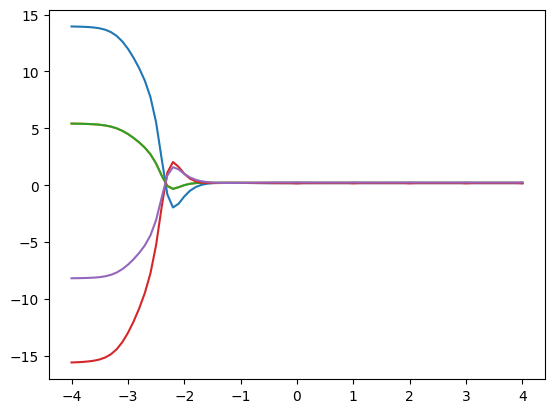

In [34]:
data = pd.read_csv('../csv/test_priority.csv',sep=';', header=None)
print(data.values)
data = np.array(data.values)
x_flat = [i for sub_l in data for i in sub_l]
print(x_flat)





def priority_for_dif_types(matrix, c = 0, k = 1):
    shape = matrix.shape
    eye_matrix = np.eye(shape[0])
    eye_matrix_inv = np.where(eye_matrix==1,0,1)
    matrix_copy = matrix*eye_matrix_inv
    vector_ones = np.ones((shape[1]))

    b_matrix = (matrix+c*eye_matrix)
    if int(k) == k and k>0:
        delim = np.linalg.matrix_power(b_matrix,int(k))
        delimet_s = np.sum(delim)
        # delimet_s = np.sum(delim)
        result = np.dot((delim/delimet_s),vector_ones.transpose())
        # print(result)
        return result

    b_matrix = np.asarray(b_matrix, 'int')
    print(f'{b_matrix=}')
    w, v = np.linalg.eigh(b_matrix)
    print(f'{np.round(w,2)=}')
    print(f'{np.round(v,2)=}')
    p_matrix = v.transpose()
    # p_matrix = p_matrix.dot(np.linalg.inv(fractional_matrix_power(p_matrix.T.dot(p_matrix),0.5)))
    p_matrix_inv = np.linalg.inv(p_matrix)
    d_matrix = np.zeros(shape,'float')
    d_matrix = np.diag(w)
    d_matrix = np.asarray(d_matrix, 'complex')
    print(f'{d_matrix=}')
    # d_matrix = fractional_matrix_power(d_matrix,k)
    for i in range(shape[0]):
        # print(d_matrix[i][i])
        # print(k)
        # print(float(d_matrix[i][i])**float(k))
        d_matrix[i][i] = d_matrix[i][i]**k

    print(f'{d_matrix=}')
    # delim = fractional_matrix_power(b_matrix,k)
    # print(f'{delim=}')
    #
    # delimet_s = np.sum(np.abs(delim))
    # print(f'{delimet_s=}')
    #
    # print(delim/delimet_s)

    # temp = np.dot(np.dot(p_matrix,d_matrix),p_matrix_inv)
    # temp2 = np.dot(p_matrix, p_matrix.transpose())
    # print(f'{temp=}')
    # print(f'{temp2=}')

    delim = np.dot(np.dot(p_matrix.T,d_matrix),p_matrix)
    delimet_s = np.sum(delim)
    result = delim.dot(vector_ones.transpose())/delimet_s
    # print(result)
    return result

k_indexes = np.round(np.arange(-4., 4.1, 0.1),2)
results = []
for i in k_indexes:
    print(i)
    results.append(priority_for_dif_types(data, c=1, k=i+1))

# for i in range(len(results)):
#     for e in range(len(results[i])):
#         results[i][e] = results[i][e].real+results[i][e].imag
print(results)
print(k_indexes)
plt.plot(k_indexes, results)
# plt.ylim([0.145, 0.245])
# plt.xscale('log')
plt.show()

# res = priority_for_dif_types(data,c=1,k=1)
# print(abs(res))

-4.0
b_matrix=array([[1, 2, 2, 2, 4],
       [3, 1, 3, 3, 3],
       [3, 3, 1, 3, 3],
       [2, 2, 2, 1, 2],
       [2, 4, 4, 4, 1]])
(-4.290952593451389+0j)
-3.0
-0.012657235207640912
(-2.0000000000000004+0j)
-3.0
-0.12499999999999992
(-1.3838947763533342+0j)
-3.0
-0.37730346175685625
(-0.07922197949317217+0j)
-3.0
-2011.2355213104022
(12.754069349297893+0j)
-3.0
0.0004820073688311304
(-3.396949358949887+0j)
-3.0
-0.025511311308088824
(-2.0000000000000004+0j)
-3.0
-0.12499999999999992
(-1.778536635806044+0j)
-3.0
-0.17775079559279552
(0.3355124350840327+0j)
-3.0
26.47732686510248
(11.839973559671899+0j)
-3.0
0.0006024871690838376
-3.9
b_matrix=array([[1, 2, 2, 2, 4],
       [3, 1, 3, 3, 3],
       [3, 3, 1, 3, 3],
       [2, 2, 2, 1, 2],
       [2, 4, 4, 4, 1]])
(-4.290952593451389+0j)
-2.9
(-0.013925171346974581-0.004524562444050158j)
(-2.0000000000000004+0j)
-2.9
(-0.12741464194217006-0.041399526755474474j)
(-1.3838947763533342+0j)
-2.9
(-0.370687057047714-0.1204435259734134j)
(-0.

/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/2753159426.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float(DL[i][i])**float(k))
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/2753159426.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float(DU[i][i])**float(k))
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/2753159426.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  delim[i][e] = delimU[i][e]
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/2753159426.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  delim[i][e] = delimL[i][e]


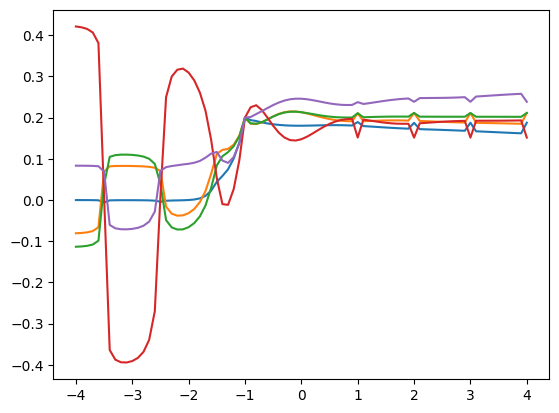

In [36]:
def priority_for_dif_types(matrix, c = 0, k = 1):
    shape = matrix.shape
    eye_matrix = np.eye(shape[0])
    eye_matrix_inv = np.where(eye_matrix==1,0,1)
    matrix_copy = matrix*eye_matrix_inv
    vector_ones = np.ones((shape[1]))

    b_matrix = (matrix+c*eye_matrix)
    if int(k) == k and k>0:
        delim = np.linalg.matrix_power(b_matrix,int(k))
        delimet_s = np.sum(delim)
        # delimet_s = np.sum(delim)
        result = np.dot((delim/delimet_s),vector_ones.transpose())
        # print(result)
        return result

    b_matrix = np.asarray(b_matrix, 'int')
    print(f'{b_matrix=}')
    wL, vL = np.linalg.eigh(b_matrix, 'L')
    wU, vU = np.linalg.eigh(b_matrix, 'U')
    # print(f'{np.round(w,2)=}')
    # print(f'{np.round(v,2)=}')
    p_matrix_L = vL.T
    p_matrix_U = vU.T

    # print(np.round(p_matrix.dot(p_matrix.T), 2))

    # p_matrix = p_matrix.dot(np.linalg.inv(fractional_matrix_power(p_matrix.T.dot(p_matrix),0.5)))
    # p_matrix_inv = np.linalg.inv(p_matrix)
    # d_matrix = np.zeros(shape,'float')
    DL = np.diag(wL)
    DL = np.asarray(DL, 'complex')
    DU = np.diag(wU)
    DU = np.asarray(DU, 'complex')
    # print(f'{np.round(p_matrix,5)=}')
    # d_matrix = fractional_matrix_power(d_matrix,k)
    for i in range(shape[0]):
        print(DL[i][i])
        print(k)
        print(float(DL[i][i])**float(k))
        # print(type(d_matrix[i][i]))
        # print(type(k))
        DL[i][i] = DL[i][i]**k

    for i in range(shape[0]):
        print(DU[i][i])
        print(k)
        print(float(DU[i][i])**float(k))
        # print(type(d_matrix[i][i]))
        # print(type(k))
        DU[i][i] = DU[i][i]**k

    # print(f'{d_matrix=}')
    # delim = fractional_matrix_power(b_matrix,k)
    # print(f'{delim=}')
    #
    # delimet_s = np.sum(np.abs(delim))
    # print(f'{delimet_s=}')
    #
    # print(delim/delimet_s)

    # temp = np.dot(np.dot(p_matrix,d_matrix),p_matrix_inv)
    # temp2 = np.dot(p_matrix, p_matrix.transpose())
    # print(f'{temp=}')
    # print(f'{temp2=}')

    delimL = np.dot(np.dot(p_matrix_L.T,DL),p_matrix_L)
    delimU = np.dot(np.dot(p_matrix_U.T,DU),p_matrix_U)
    delim = np.zeros(delimU.shape)
    for i in range(delimL.shape[0]):
        for e in range(i, delimL.shape[1]):
            delim[i][e] = delimU[i][e]

    for i in range(delimL.shape[0]):
        for e in range(i):
            delim[i][e] = delimL[i][e]
    delimet_s = np.sum(np.abs(delim))
    result = delim.dot(vector_ones.transpose())/delimet_s
    # print(result)
    return result

k_indexes = np.round(np.arange(-4., 4.1, 0.1),2)
results = []
for i in k_indexes:
    print(i)
    results.append(priority_for_dif_types(data, c=1, k=i+1))

# for i in range(len(results)):
#     for e in range(len(results[i])):
#         results[i][e] = results[i][e].real+results[i][e].imag
print(results)
print(k_indexes)
plt.plot(k_indexes, results)
# plt.ylim([0.145, 0.245])
# plt.xscale('log')
plt.show()

# res = priority_for_dif_types(data,c=1,k=1)
# print(abs(res))

### Pareto


In [90]:
def find_pareto(matrix):
    result = np.zeros((matrix.shape[0], matrix.shape[0]))
    for i in range(matrix.shape[0]):
        for i2 in range(matrix.shape[0]):
            better = False
            worse = False
            incomparable = False
            if i == i2:
                result[i][i2] = -1
                continue

            for e in range(matrix.shape[1]):
                if matrix[i][e]>matrix[i2][e]:
                    if worse:
                        incomparable = True
                        better = False
                        break
                    better = True
                elif matrix[i][e]<matrix[i2][e]:
                    if better:
                        incomparable = True
                        better = False
                        break
                    worse = True
            if better:
                result[i][i2] = 1
            if incomparable:
                result[i][i2] = 2
            if not better and not incomparable and not worse:
                result[i][i2] = 3

    priority_vector = np.zeros(matrix.shape[0])
    for i in range(result.shape[0]):
        cnt = np.sum(result.T[i][:]==1)
        priority_vector[i]=cnt

    sorted_priorities = sorted(priority_vector.tolist())
    sorted_priorities = np.unique(sorted_priorities).tolist()
    replace_dict = {}
    for i in range(1,len(sorted_priorities)):
        if sorted_priorities[i]-sorted_priorities[i-1]>1:
            replace_dict[sorted_priorities[i]] = sorted_priorities[i-1]+1
            sorted_priorities[i] = sorted_priorities[i-1]+1

    for key, value in replace_dict.items():
        priority_vector[priority_vector==key] = value

    arc_amount = 0
    rib_amount = 0
    for i in range(result.shape[0]):
        for e in range(i+1, result.shape[1]):
            if result[i][e] == 1:
                arc_amount+=1
            if result[i][e] == 3:
                rib_amount+=1

    all_am = result.shape[0] * (result.shape[0]-1)
    kd = (2*arc_amount)/(all_am)*100.
    knr = 2 * rib_amount / all_am
    kns = 100 - (kd + knr)
    kpp = (np.unique(priority_vector).shape[0]-1)/(result.shape[0]-1)*100.

    return result, priority_vector, [kd, knr, kns, kpp]

def load_matrix_with_attributes(path: str):
    data = pd.read_csv(path,sep=';', header=None)
    data = np.array(data.values)
    attributes = data[0,1:]
    objects = data[1:,0]
    data = np.array(data[1:, 1:],'float')
    return attributes, objects, data






### load data for pareto

In [65]:
attributes, objects, matrix = load_matrix_with_attributes('../csv/test_pareto_01.csv')
print(f'''attributes
{attributes}''')
print(f'''objects
{objects}''')
print(f'''matrix
{matrix}''')

attributes
['Кроссплатформенность' 'Возможность добавлять свои данные'
 'Возможность делиться своими данными' 'Добавление медиафайлов'
 'Стоимость' 'Локализация' 'Показов за последний месяц в Google'
 'Возрастное ограничение']
objects
['foursquare' 'Tripster' 'MAPS.ME' 'GOOGLE My Maps'
 'Конструктор карт Яндекса' 'SYGIC TRAVEL MAPS' 'Смородина' 'Redigo'
 'TripAdvisor' 'HERE WeGo']
matrix
[[  2.   2.   1.   1.   2.   1. 320.  14.]
 [  2.   2.   1.   0.   2.   1. 320.  14.]
 [  1.   2.   1.   1.   1.   1. 270.  14.]
 [  0.   2.   1.   2.   1.   1. 337.  18.]
 [  0.   2.   1.   2.   1.   1. 276.  18.]
 [  1.   2.   1.   1.   1.   1. 172.  18.]
 [  0.   0.   1.   0.   2.   0. 114.  18.]
 [  1.   0.   0.   0.   2.   1. 216.  14.]
 [  2.   2.   1.   1.   2.   1. 254.  14.]
 [  2.   0.   0.   0.   2.   1. 106.  14.]]


### find priority vector of pareto

In [92]:
dominance, priority_vector, metrics = find_pareto(matrix)
print(f'''dominance matrix
{dominance}''')
print(f'''priority vector
{priority_vector}''')
print(f'''ПД {metrics[0]}, ПНР {metrics[1]}, ПНС {metrics[2]}, КПП {np.round(metrics[3],2)}''')

dominance matrix
[[-1.  1.  1.  2.  2.  2.  2.  1.  1.  1.]
 [ 0. -1.  2.  2.  2.  2.  2.  1.  2.  1.]
 [ 0.  2. -1.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2. -1.  1.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  0. -1.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2. -1.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2. -1.  2.  2.  2.]
 [ 0.  0.  2.  2.  2.  2.  2. -1.  0.  2.]
 [ 0.  2.  2.  2.  2.  2.  2.  1. -1.  1.]
 [ 0.  0.  2.  2.  2.  2.  2.  2.  0. -1.]]
priority vector
[0. 1. 1. 0. 1. 0. 0. 2. 1. 2.]
ПД 20.0, ПНР 0.0, ПНС 80.0, КПП 22.22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


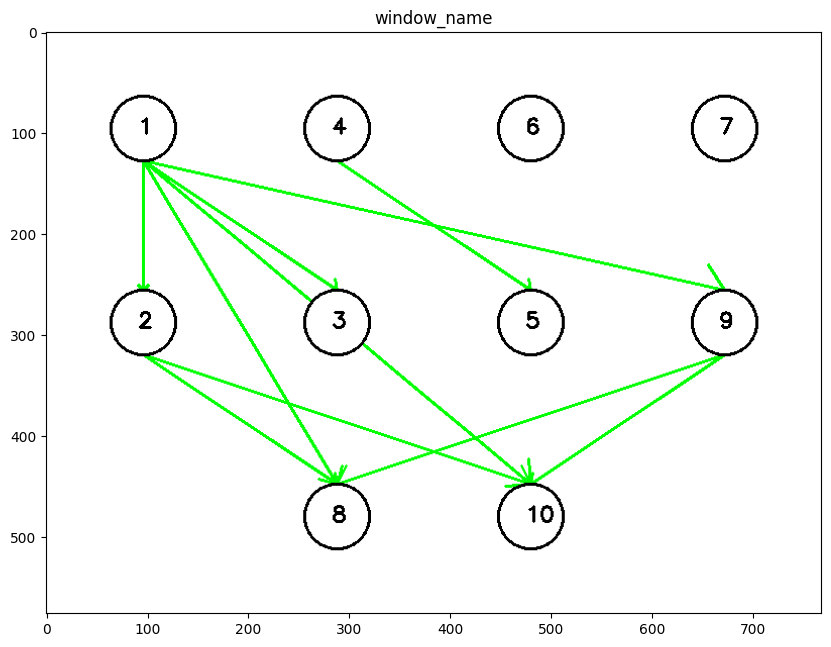

In [70]:
import cv2 as cv

def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception:
        print('error')

def draw_diagram_of_dominance(dominance_matrix: np.ndarray, priority_vector: np.ndarray):
    circle_size = 64
    circles_gap = 128
    unique_levels, counts = np.unique(priority_vector, return_counts=True)
    image_shape = ((circle_size+circles_gap)*unique_levels.shape[0], (circle_size+circles_gap)*np.max(counts))
    image_center_x = image_shape[1]/2
    image_center_y = image_shape[0]/2

    # unique_levels.sort()
    indexes = []
    for i in range(unique_levels.shape[0]):
        indx = np.array(np.where(priority_vector==unique_levels[i])).tolist()
        indexes.append(indx[0])

    # indexes = np.array(indexes)
    result = np.ones((image_shape[0], image_shape[1], 3))*255
    y_start = image_center_y+circles_gap/2+circle_size/2 if unique_levels.shape[0] % 2 == 0 else image_center_y
    start_y = unique_levels.shape[0]//2
    circles_positions = np.zeros((priority_vector.shape[0],2))
    for i in range(unique_levels.shape[0]):
        pos_y = y_start+(unique_levels[i]-start_y)*(circle_size+circles_gap)
        if counts[i] % 2 == 0:
            start = len(indexes[i])/2
            image_start = image_center_x+circles_gap/2+circle_size/2
            for e in range(len(indexes[i])):
                pos_x = image_start+(e-start)*(circle_size+circles_gap)

                circles_positions[indexes[i][e],:] = [pos_x, pos_y]
                # result = cv.circle(result, (int(pos_x),int(pos_y)), circle_size//2, (0,0,0), 2)
                # result = cv.circle(result, (int(pos_x),int(pos_y)), 1, (0,0,0), 2)
                # result = cv.putText(result, str(indexes[i][e]), (int(pos_x),int(pos_y)), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)

        if counts[i] % 2 == 1:
            start = len(indexes[i])//2
            image_start = image_center_x
            for e in range(len(indexes[i])):
                pos_x = image_start+(e-start)*(circle_size+circles_gap)
                # pos_y = (circle_size+circles_gap*2)+unique_levels[i]*(circle_size+circles_gap)
                circles_positions[indexes[i][e]] = [pos_x, pos_y]
                # result = cv.circle(result, (int(pos_x),int(pos_y)), circle_size//2, (0,0,0), 2)
                # result = cv.circle(result, (int(pos_x),int(pos_y)), 1, (0,0,0), 2)
                # result = cv.putText(result, str(indexes[i][e]), (int(pos_x),int(pos_y)), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)

    circles_positions = np.array(circles_positions, 'int')
    for i in range(dominance_matrix.shape[0]):
        for e in range(dominance_matrix.shape[1]):
            if dominance_matrix[i][e]==1:
                result = cv.arrowedLine(result, (circles_positions[i][0], circles_positions[i][1]+circle_size//2), (circles_positions[e][0], circles_positions[e][1]-circle_size//2),
                                     (0,150,0), 2, tipLength = 0.05)
            if dominance_matrix[i][e]==3 and e > i:
                if circles_positions[i][1] != circles_positions[e][1]:
                    result = cv.line(result, (circles_positions[i][0], circles_positions[i][1]+circle_size//2), (circles_positions[e][0], circles_positions[e][1]-circle_size//2),
                                     (200,0,0), 2)
                else:
                    result = cv.line(result, (circles_positions[i][0]++circle_size//2, circles_positions[i][1]), (circles_positions[e][0]-circle_size//2, circles_positions[e][1]),
                                         (200,0,0), 2)

    for i in range(circles_positions.shape[0]):
        result = cv.circle(result, circles_positions[i], circle_size//2, (255,255,255), -1)
        result = cv.circle(result, circles_positions[i], circle_size//2, (0,0,0), 2)
        # result = cv.circle(result, circles_positions[i], 1, (0,0,0), 2)
        result = cv.putText(result, str(i+1), circles_positions[i]-(5,-5), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)
    show_picture_plot(result)
    cv.imwrite('pareto.png', result)

draw_diagram_of_dominance(dominance, priority_vector)

In [119]:
a = np.array([[1,0],[0,3]])
b = np.array([[2,1],[2,3]])
np.dot(a,b)
a**2

array([[1, 0],
       [0, 9]])

In [50]:
from scipy.linalg import fractional_matrix_power
a = np.array([[-1, -6], [2, 6]])
b = np.array([[1,0],[0,1]])
w, v = np.linalg.eig(a)
print ("Матрица A:\n", a)
print ("Собственные числа:\n", w)
print ("Собственные векторы:\n", v)
print(a.dot(a.T))
print(v.dot(np.linalg.inv(fractional_matrix_power(v.T.dot(v),0.5))))
v = v.dot(np.linalg.inv(fractional_matrix_power(v.T.dot(v),0.5)))
print(v.dot(v.T))

Матрица A:
 [[-1 -6]
 [ 2  6]]
Собственные числа:
 [2. 3.]
Собственные векторы:
 [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]
[[ 37 -38]
 [-38  40]]
[[-0.96649965  0.25666794]
 [-0.25666794 -0.96649965]]
[[1.0000000e+00 5.8269719e-15]
 [5.8269719e-15 1.0000000e+00]]


In [34]:
from scipy.linalg import fractional_matrix_power
a = np.array([[1.0, 3.0], [1.0, 4.0]])
b = fractional_matrix_power(a, 0.5)
b

array([[0.75592895, 1.13389342],
       [0.37796447, 1.88982237]])

In [38]:
b = np.array([[2,0],[0,1]])
b_s = np.max(b)
b/b_s

array([[1. , 0. ],
       [0. , 0.5]])

In [56]:
from scipy.sparse.linalg import eigs
a = np.array([[-1, -6], [2, 6]])
vals, vecs = eigs(a, k=1)
print ("Матрица A:\n", a)
print ("Собственные числа:\n", vals)
print ("Собственные векторы:\n", vecs)

Матрица A:
 [[-1 -6]
 [ 2  6]]
Собственные числа:
 [2.+0.j 3.+0.j]
Собственные векторы:
 [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]


In [89]:
a = -4.290952593451389
b = 3.75
print((-4.290952593451389)**3.75)
print(-4.290952593451389**3.75)

(166.5564435699379-166.55644356993832j)
-235.54638139723556


In [46]:
# matrix = data
matrix = np.array([[1,2,-1],[4,3,5],[-1,3,-3]])
k=2.5
c=1
shape = matrix.shape
# eye_matrix = np.eye(shape[0])
# eye_matrix_inv = np.where(eye_matrix==1,0,1)
# matrix_copy = matrix*eye_matrix_inv
# vector_ones = np.ones((shape[1]))
#
# b_matrix = (matrix_copy+c*eye_matrix)
b_matrix = (matrix)
# if int(k) == k and k>0:
#     delim = np.linalg.matrix_power(b_matrix,int(k))
#     delimet_s = np.sum(delim)
#     # delimet_s = np.sum(delim)
#     result = np.dot((delim/delimet_s),vector_ones.transpose())
#     # print(result)
#     # return result

b_matrix = np.asarray(b_matrix, 'int')
print(f'{b_matrix=}')
wL, vL = np.linalg.eigh(b_matrix, 'L')
wU, vU = np.linalg.eigh(b_matrix, 'U')
# print(f'{np.round(w,2)=}')
# print(f'{np.round(v,2)=}')
p_matrix_L = vL.T
p_matrix_U = vU.T

# print(np.round(p_matrix.dot(p_matrix.T), 2))

# p_matrix = p_matrix.dot(np.linalg.inv(fractional_matrix_power(p_matrix.T.dot(p_matrix),0.5)))
# p_matrix_inv = np.linalg.inv(p_matrix)
# d_matrix = np.zeros(shape,'float')
DL = np.diag(wL)
DL = np.asarray(DL, 'complex')
DU = np.diag(wU)
DU = np.asarray(DU, 'complex')
# print(f'{np.round(p_matrix,5)=}')
# d_matrix = fractional_matrix_power(d_matrix,k)
for i in range(shape[0]):
    print(DL[i][i])
    print(k)
    print(float(DL[i][i])**float(k))
    # print(type(d_matrix[i][i]))
    # print(type(k))
    DL[i][i] = DL[i][i]**k

for i in range(shape[0]):
    print(DU[i][i])
    print(k)
    print(float(DU[i][i])**float(k))
    # print(type(d_matrix[i][i]))
    # print(type(k))
    DU[i][i] = DU[i][i]**k

# print(f'''{np.asarray(D, 'float')=}''')
dtL = np.dot(np.dot(p_matrix_L.T,DL),p_matrix_L)
dtL = np.asarray(dtL, 'float')
dtU = np.dot(np.dot(p_matrix_U.T,DU),p_matrix_U)
dtU = np.asarray(dtU, 'float')
dt = np.zeros(dtL.shape)
for i in range(dtL.shape[0]):
    for e in range(i, dtL.shape[1]):
        dt[i][e] = dtU[i][e]

for i in range(dtL.shape[0]):
    for e in range(i):
        dt[i][e] = dtL[i][e]
print(data)
print(b_matrix)
print(dtL)
print(dtU)
print(dt)
print(fractional_matrix_power(b_matrix, k))

b_matrix=array([[ 1,  2, -1],
       [ 4,  3,  5],
       [-1,  3, -3]])
(-5.3901125071328195+0j)
2.5
(2.0651206815020665e-14+67.45196028568837j)
(-0.08594345944353884+0j)
2.5
(6.62953302358185e-19+0.0021653698121605635j)
(6.476055966576359+0j)
2.5
106.72753604890782
(-6.3103686141461+0j)
2.5
(3.062581696240722e-14+100.0315094400446j)
(1.1593374251255972+0j)
2.5
1.4471869559159052
(6.151031189020505+0j)
2.5
93.83607265209035
[[0 2 2 2 4]
 [3 0 3 3 3]
 [3 3 0 3 3]
 [2 2 2 0 2]
 [2 4 4 4 0]]
[[ 1  2 -1]
 [ 4  3  5]
 [-1  3 -3]]
[[32.81264564 47.84182857 11.68343037]
 [47.84182857 69.75483131 17.03479442]
 [11.68343037 17.03479442  4.16005911]]
[[ 7.05296906 19.93780481  9.87233389]
 [19.93780481 69.61268886 35.88216055]
 [ 9.87233389 35.88216055 18.61760169]]
[[ 7.05296906 19.93780481  9.87233389]
 [47.84182857 69.61268886 35.88216055]
 [11.68343037 17.03479442 18.61760169]]
[[15.46586923 +7.98942913j 20.9188621  -8.48392281j
   9.92471255+19.10373704j]
 [43.24352721-15.94289557j 60.2833

/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/3525080365.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float(DL[i][i])**float(k))
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/3525080365.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float(DU[i][i])**float(k))
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/3525080365.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  dtL = np.asarray(dtL, 'float')
/var/folders/9n/3wn9qyhs79zcrzbjd564bjg80000gn/T/ipykernel_66690/3525080365.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  dtU = np.asarray(dtU, 'float')


In [44]:
from scipy.linalg import fractional_matrix_power
matrix = np.array([[1,2,-1],[4,3,5],[-1,3,-3]])
print(matrix**2)
# print(matrix.dot(matrix))
print(fractional_matrix_power(matrix,2))

[[ 1  4  1]
 [16  9 25]
 [ 1  9  9]]
[[10  5 12]
 [11 32 -4]
 [14 -2 25]]
[[10  5 12]
 [11 32 -4]
 [14 -2 25]]
